In [1]:
from pandas import read_csv 
import numpy as np

In [4]:
df = read_csv('international-airline-passengers.csv', usecols=[1])
#df = read_csv('international-airline-passengers.csv')


df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [5]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [6]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [8]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Using TensorFlow backend.


In [12]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size = 1, validation_data=(testX, testY))
model.summary()

Train on 84 samples, validate on 36 samples
Epoch 1/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0306 - val_loss: 0.3996
Epoch 2/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.3212
Epoch 3/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.2961
Epoch 4/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.2731
Epoch 5/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.2559
Epoch 6/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.2313
Epoch 7/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.2251
Epoch 8/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0147 - val_loss: 0.2160
Epoch 9/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0138 - val_loss: 0.2115
Epoch 10/10
84/84 [==============================] - 0s 3ms/step - loss: 0

In [17]:
y_pred = model.predict(testX)
y_pred = scaler.inverse_transform(y_pred).ravel()

trueY = scaler.inverse_transform([testY]).ravel()

In [18]:
import matplotlib.pyplot as plt

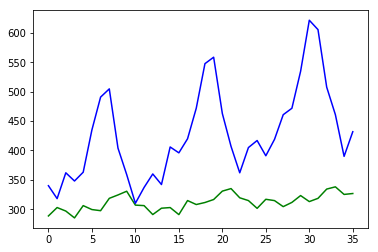

In [19]:
plt.plot(y_pred, c='g')
plt.plot(trueY, c='b')
plt.show()

In [20]:
score = model.evaluate(testX,testY)
score

36/36 [==============================] - 0s 146us/step


0.200906655854649

In [21]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

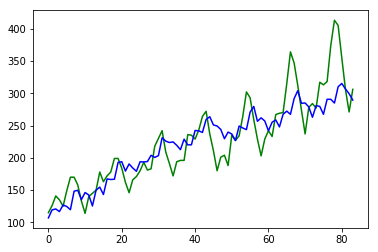

In [22]:
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()